Librerie

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from statistics import mean, stdev
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import ADASYN, SMOTE

import warnings
warnings.filterwarnings('ignore')

rs = 42

Import per colab

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

zip_file = "fetal-health-classification.zip"
folder_name = "fetal-health-classification"

if not os.path.exists(zip_file) and not os.path.exists(folder_name):
    # Scarica il dataset da Kaggle
    !kaggle datasets download -d andrewmvd/fetal-health-classification
    # Decomprime il file zip
    !unzip -o {zip_file}  # -o sovrascrive qualsiasi file senza chiedere conferma
else:
    print("Il dataset è già presente, nessun download necessario.")

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 30.3MB/s]
Archive:  fetal-health-classification.zip
  inflating: fetal_health.csv        


#### ANALISI ESPLORATIVA

In [ ]:
# Carico dataset
data = pd.read_csv("fetal_health.csv", delimiter=',')

# Struttura e dimensione del dataset
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
# Controllo valori nulli
missing_values = data.isnull().sum()
print(missing_values)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

<Axes: xlabel='fetal_health', ylabel='count'>

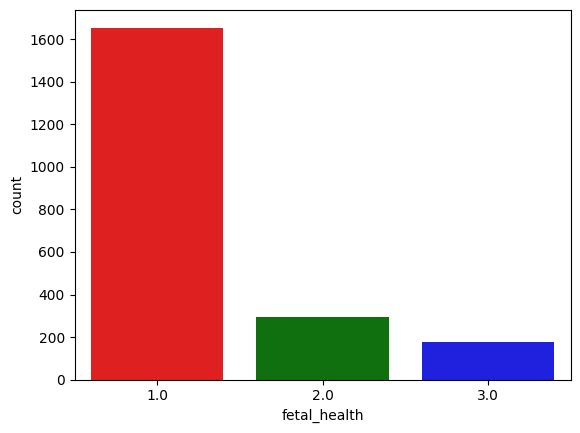

In [ ]:
# Controllo se i dati della variabile risposta sono bilanciati

colori = ['red', 'green', 'blue']
sns.countplot(data= data, x="fetal_health", palette=colori)

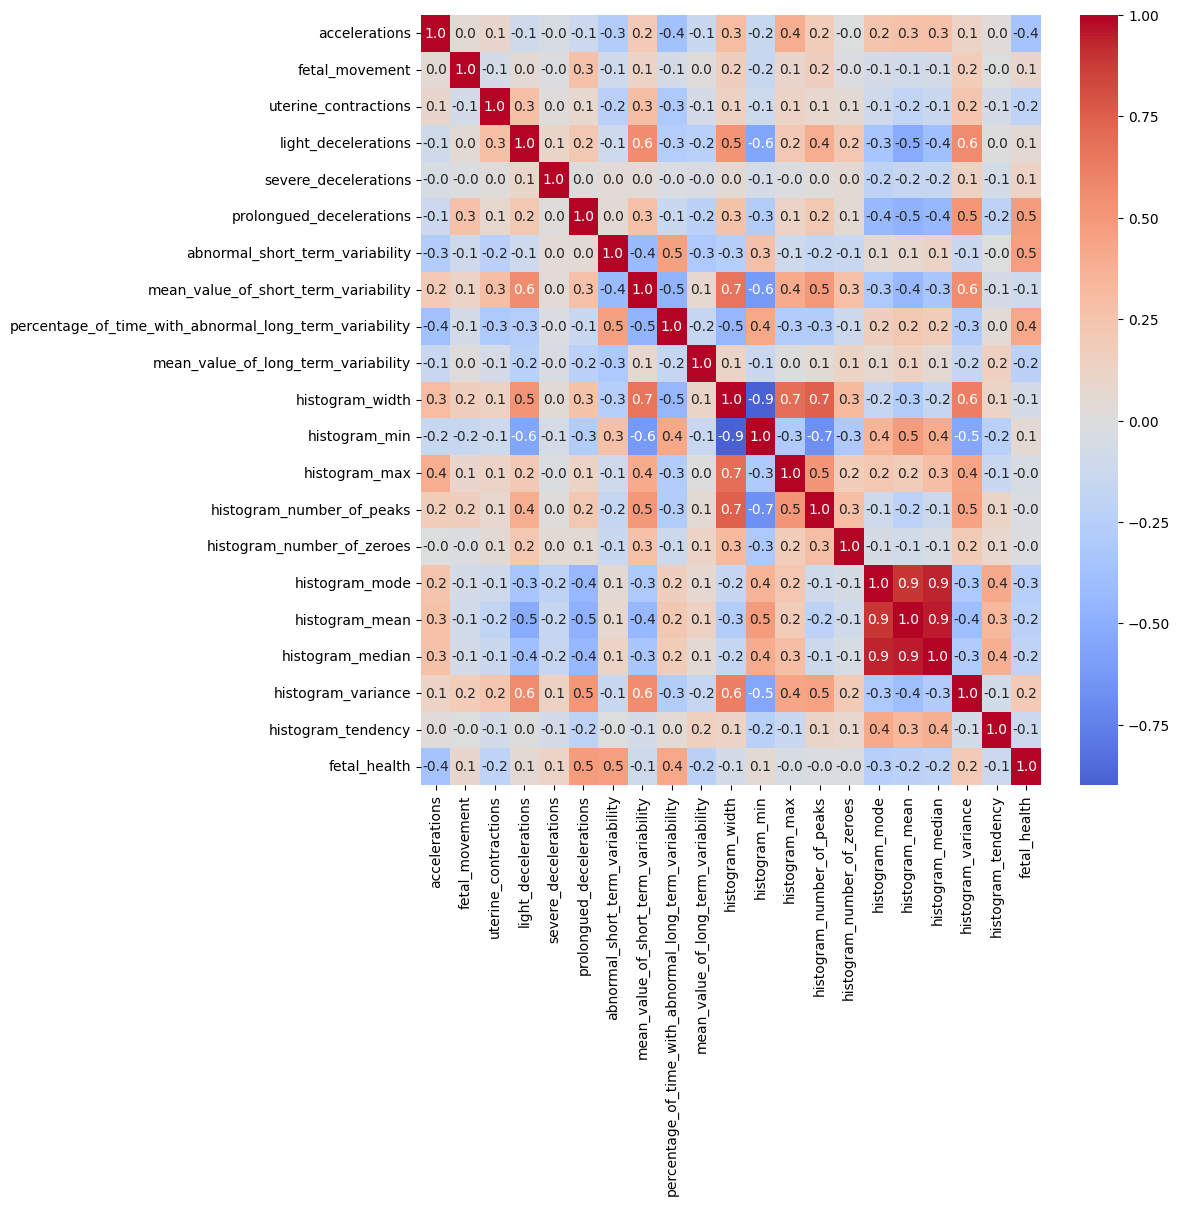

In [ ]:
# Calcola la matrice di correlazione
corr_mat = data.iloc[:, 1:].corr()

# Plot matrice correlazione
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.show()

In [ ]:
# Separazione delle features e della variabile target
X = data.drop(['fetal_health'], axis=1)
y = data['fetal_health']

In [ ]:
# Tecnica di data augmentation per bilanciare le classi
ada = ADASYN(random_state=rs)
X_res, y_res = ada.fit_resample(X, y)

In [ ]:
# Standardizzo
col_names = list(X_res.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X_res)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,4940.0,2.013684e-15,1.000101,-3.086678,-0.716281,-0.097917,0.829630,2.478601
accelerations,4940.0,-4.602706e-17,1.000101,-0.511967,-0.511967,-0.511967,0.058534,5.908807
fetal_movement,4940.0,1.150676e-17,1.000101,-0.287866,-0.287866,-0.273896,-0.214581,7.180539
uterine_contractions,4940.0,-2.531488e-16,1.000101,-1.133604,-0.989851,-0.123046,0.699699,3.919185
light_decelerations,4940.0,5.753382e-18,1.000101,-0.568921,-0.568921,-0.568921,0.145275,4.787550
severe_decelerations,4940.0,-1.150676e-17,1.000101,-0.088810,-0.088810,-0.088810,-0.088810,14.480195
prolongued_decelerations,4940.0,0.000000e+00,1.000101,-0.428858,-0.428858,-0.428858,-0.428858,5.281778
abnormal_short_term_variability,4940.0,6.904059e-17,1.000101,-2.471347,-0.728672,0.252491,0.713563,1.784650
mean_value_of_short_term_variability,4940.0,1.150676e-17,1.000101,-1.010964,-0.786408,-0.337297,0.539651,6.623927
percentage_of_time_with_abnormal_long_term_variability,4940.0,-1.610947e-16,1.000101,-0.763041,-0.763041,-0.520725,0.488927,2.912092


In [ ]:
# Definire la mappatura delle classi
class_mapping = {1.0: 1, 2.0: 2, 3.0: 3}

# Mappare le classi originali ai nuovi valori
y_enc = y_res.map(class_mapping)

In [ ]:
# Divisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y_enc, test_size=0.3, random_state=rs)

#### Logistic Regression

In [ ]:
# Creo e addestro il modello di regressione logistico
lr = LogisticRegression(C=1e10, solver='liblinear')

# K fold cross validation
skf = KFold(n_splits=5, shuffle=True, random_state=rs)
lst_accu_stratified = [] # lista accuracy
y_pred_l = [] # lista predictions
ll_l = [] # lista log loss

for train_index, test_index in skf.split(X_df, y_enc):
    x_train_fold, x_test_fold = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train_fold, y_test_fold = y_enc.iloc[train_index], y_enc.iloc[test_index]

    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

    # Prevedo i valori di test
    y_pred_lr = lr.predict(X_test)
    y_pred_l.append(y_pred_lr)

    # Calcolo i valori di log loss
    ll = log_loss(y_test, lr.predict_proba(X_test))
    ll_l.append(ll)

# Calcolo la media del log loss
ll = np.mean([np.mean(ll) for ll in ll_l])

# Valori di Accuracy e Log Loss
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy:', max(lst_accu_stratified))
print('\nMinimum Accuracy:', min(lst_accu_stratified))
print('\nOverall Accuracy:', mean(lst_accu_stratified))
print('\nStandard Deviation:', stdev(lst_accu_stratified))
print('\nOverall Log Loss:', ll)

List of possible accuracy: [0.8421052631578947, 0.8390688259109311, 0.8572874493927125, 0.847165991902834, 0.8431174089068826]

Maximum Accuracy: 0.8572874493927125

Minimum Accuracy: 0.8390688259109311

Overall Accuracy: 0.845748987854251

Standard Deviation: 0.007070546233430359

Overall Log Loss: 0.3979522051079566


In [ ]:
# Classification report
from sklearn.model_selection import cross_val_score
for score in ["f1_weighted", "precision_weighted", "recall_weighted", "accuracy"]:
    cvs = cross_val_score(lr, X_train, y_train, scoring=score, cv=5, error_score = "raise").mean()
    print(score + " : "+ str(cvs))

f1_weighted : 0.8454771766024803
precision_weighted : 0.8467376019300403
recall_weighted : 0.8455781601599425
accuracy : 0.8455781601599425


In [ ]:
# Matrice di confusione
for i in range(0,5):
  print(f"fold numero {i}:\n", confusion_matrix(y_test, y_pred_l[i]), f"\n")

fold numero 0:
 [[451  61  11]
 [ 24 377  74]
 [  5  52 427]] 

fold numero 1:
 [[452  61  10]
 [ 22 371  82]
 [  3  49 432]] 

fold numero 2:
 [[455  59   9]
 [ 23 374  78]
 [  4  51 429]] 

fold numero 3:
 [[451  62  10]
 [ 20 378  77]
 [  6  51 427]] 

fold numero 4:
 [[452  61  10]
 [ 21 376  78]
 [  6  50 428]] 



In [ ]:
# Odds Ratio

# Prendo i coefficienti dal modello fittato
coefficients = lr.coef_[0]

# Calcolo gli OR
odds_ratios = np.exp(coefficients)

column_names_list = data.columns[:-1].tolist()

# Creo un dataset per stampare
odds_ratios_df = pd.DataFrame({
    'Feature': column_names_list,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

print(odds_ratios_df)

                                              Feature  Coefficient  Odds Ratio
0                                      baseline value     0.236595    1.266928
1                                       accelerations     3.209664   24.770755
2                                      fetal_movement    -0.447270    0.639372
3                                uterine_contractions     0.620734    1.860293
4                                 light_decelerations    -0.022580    0.977673
5                                severe_decelerations    -0.058375    0.943297
6                            prolongued_decelerations    -2.658823    0.070031
7                     abnormal_short_term_variability    -1.684010    0.185628
8                mean_value_of_short_term_variability     0.749811    2.116601
9   percentage_of_time_with_abnormal_long_term_var...    -0.578554    0.560708
10                mean_value_of_long_term_variability    -0.088980    0.914864
11                                    histogram_widt

#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=rs)

# Stratified k fold cross validation in quanto ho un dataset sbilanciato
skf = KFold(n_splits=5, shuffle=True, random_state=rs)

lst_accu_stratified = []
y_pred_l = []
ll_l = []

for train_index, test_index in skf.split(X_df, y_enc):
    x_train_fold, x_test_fold = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train_fold, y_test_fold = y_enc.iloc[train_index], y_enc.iloc[test_index]
    rf.fit(x_train_fold, y_train_fold)

    lst_accu_stratified.append(rf.score(x_test_fold, y_test_fold))

    # Prevedo i valori di test
    y_pred_lr = rf.predict(X_test)
    y_pred_l.append(y_pred_lr)

    # Calcolo la Log Loss
    ll = log_loss(y_test, rf.predict_proba(X_test))
    ll_l.append(ll)

# Media della log loss
ll = np.mean([np.mean(ll) for ll in ll_l])

# Stampo i valori
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy:', max(lst_accu_stratified))
print('\nMinimum Accuracy:', min(lst_accu_stratified))
print('\nOverall Accuracy:', mean(lst_accu_stratified))
print('\nStandard Deviation:', stdev(lst_accu_stratified))
print('\nOverall Log Loss:', ll)

List of possible accuracy: [0.9757085020242915, 0.9777327935222672, 0.9827935222672065, 0.9838056680161943, 0.9827935222672065]

Maximum Accuracy: 0.9838056680161943

Minimum Accuracy: 0.9757085020242915

Overall Accuracy: 0.9805668016194332

Standard Deviation: 0.0036069898140092143

Overall Log Loss: 0.04524164705722365


In [ ]:
# Matrice di confusione
for i in range(0,5):
  print(f"fold numero {i}:\n", confusion_matrix(y_test, y_pred_l[i]), f"\n")

fold numero 0:
 [[503  20   0]
 [  2 473   0]
 [  0   2 482]] 

fold numero 1:
 [[515   6   2]
 [  1 474   0]
 [  0   0 484]] 

fold numero 2:
 [[523   0   0]
 [  0 475   0]
 [  0   0 484]] 

fold numero 3:
 [[523   0   0]
 [  0 475   0]
 [  0   0 484]] 

fold numero 4:
 [[523   0   0]
 [  0 475   0]
 [  0   0 484]] 



In [ ]:
# Classification report
for score in ["f1_weighted", "precision_weighted", "recall_weighted", "accuracy"]:
    cvs = cross_val_score(rf, X_train, y_train, scoring=score, cv=5, error_score = "raise").mean()
    print(score + " : "+ str(cvs))

f1_weighted : 0.9806144117937337
precision_weighted : 0.9808579940876188
recall_weighted : 0.9806253816618288
accuracy : 0.9806253816618288


#### K-NN

In [ ]:
# Imposto 20 neighbors massimi e applico la GridSearch con 5 fold
knn_parameters = {"n_neighbors" : [item for item in range(2,20)]}
knn_search = GridSearchCV(
  KNeighborsClassifier(),
  param_grid=knn_parameters,
  cv=5,
  scoring=["accuracy"],
  return_train_score=True,
  refit="accuracy",
)

# Addestro il modello
knn_search.fit(X_train, y_train)
knn_search_results = pd.DataFrame(knn_search.cv_results_)

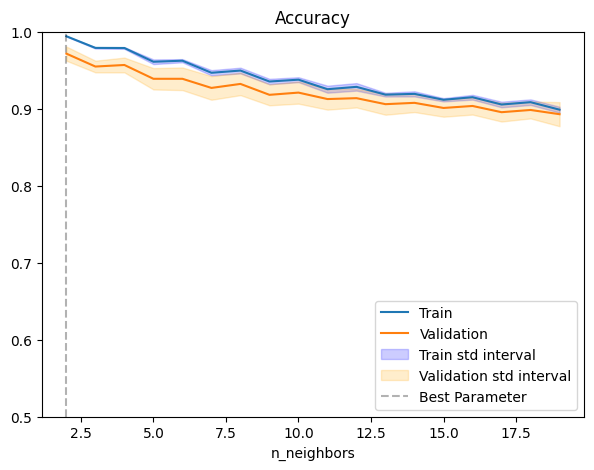

In [ ]:
# Calcolo e mostro l'accuracy
train_acc_interval = (knn_search_results['mean_train_accuracy'] - knn_search_results['std_train_accuracy'], knn_search_results['mean_train_accuracy'] + knn_search_results['std_train_accuracy'])
test_acc_interval = (knn_search_results['mean_test_accuracy'] - knn_search_results['std_test_accuracy'], knn_search_results['mean_test_accuracy'] + knn_search_results['std_test_accuracy'])

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(knn_search_results["param_n_neighbors"], knn_search_results['mean_train_accuracy'], label="Train")
ax.plot(knn_search_results["param_n_neighbors"], knn_search_results['mean_test_accuracy'], label="Validation")

ax.fill_between(knn_search_results["param_n_neighbors"].astype("float"), train_acc_interval[0], train_acc_interval[1], color='blue', alpha=0.2, label='Train std interval')
ax.fill_between(knn_search_results["param_n_neighbors"].astype("float"), test_acc_interval[0], test_acc_interval[1], color='orange', alpha=0.2, label='Validation std interval')
ax.axvline(x=knn_search.best_params_['n_neighbors'], color='black', alpha=0.3, linestyle='--', label='Best Parameter')

ax.set_title("Accuracy")
ax.set_xlabel("n_neighbors")
ax.set_ylim(0.5, 1)
ax.legend(loc="lower right")

In [ ]:
# Creo e fitto il modello con i migliori iperparametri
knn = knn_search.best_estimator_
knn.fit(X_train, y_train)
knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

# Accuracy nel train e test
knn_train_accuracy = sum(knn_train_prediction == y_train) / len(y_train)
knn_test_accuracy = sum(knn_test_prediction == y_test) / len(y_test)

print(f"Train accuracy: {knn_train_accuracy:.3f}")
print(f"Test accuracy: {knn_test_accuracy:.3f}")

Train accuracy: 0.995
Test accuracy: 0.955


In [ ]:
# Matrice di confusione
print(confusion_matrix(y_test, knn_test_prediction))

[[483  36   4]
 [ 12 458   5]
 [  2   8 474]]


In [ ]:
# Classification report
report = classification_report(y_test, knn_test_prediction)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.92      0.95       523
           2       0.91      0.96      0.94       475
           3       0.98      0.98      0.98       484

    accuracy                           0.95      1482
   macro avg       0.96      0.96      0.95      1482
weighted avg       0.96      0.95      0.95      1482



#### SVC

In [ ]:
# SVC One-vs-One
svm = SVC(decision_function_shape='ovo')

# Lista di parametri
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1e-3, 1e-2, 0.1, 1],
    'kernel': ['rbf']
}
# Creazione della ricerca su griglia con cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=2)

# Addestramento del modello con la ricerca su griglia
grid_search.fit(X_train, y_train)

# Migliori iperparametri
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.

In [ ]:
# Creazione del modello SVC con i migliori iperparametri
svm = SVC(**best_params, decision_function_shape='ovo', probability=True)
svm.fit(X_train, y_train)
predic = svm.predict(X_test)

# Matrice di confusione
print(confusion_matrix(y_test, predic))

[[498  21   4]
 [  5 469   1]
 [  0   4 480]]


In [ ]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       523
           2       0.95      0.99      0.97       475
           3       0.99      0.99      0.99       484

    accuracy                           0.98      1482
   macro avg       0.98      0.98      0.98      1482
weighted avg       0.98      0.98      0.98      1482



#### NEURAL NETWORK

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
torch.manual_seed(64)

In [ ]:
# Definire la mappatura delle classi
class_mapping = {1.0: 0, 2.0: 1, 3.0: 2}

# Mappare le classi originali ai nuovi valori
y_train_mapped = y_train.map(class_mapping)
y_test_mapped = y_test.map(class_mapping)

In [ ]:
# Conversione dei dati in tensori PyTorch per l'addestramento del modello
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_mapped.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_mapped.values, dtype=torch.long)

In [ ]:
# Rete neurale con una semplice architettura fully connected
class FullyConnected_1(nn.Module):
    def __init__(self, input_size = 21, hidden_size_1=64, hidden_size_2=32,  num_classes=3):
        super(FullyConnected_1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1,  hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):

        # Activation function (ReLU)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # Output del terzo layer senza funzione di attivazione
        return x

    # Metodo per ritornare il penultimo layer per NSVM
    def get_penultimate_layer_output(self, x):
        return x

In [ ]:
# Funzione per calcolare l'accuratezza del modello
def get_accuracy(logit, target):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / target.size(0)
    return accuracy.item()

# Funzione per calcolare la norma dei pesi del modello
def compute_weight_norm(model):
    norm = 0.0
    for name, param in model.named_parameters():
        if "weight" in name:
            norm += torch.norm(param.data, p=2)
    return norm.cpu().item()

In [ ]:
def get_predicted_class(logits):
    _, preds = torch.max(logits, 1)
    return preds

# Funzione per addestrare il modello con early stopping
def train_model(model, num_epochs, train_loader, val_loader, criterion, optimizer, patience):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    tr_pred = []
    val_pred = []

    # Inizializzazione della migliore loss di validation
    best_val_loss = float('inf')
    counter_epochs = 0

    for epoch in range(num_epochs):
        train_loss_t = 0.0
        train_acc = 0.0

        model.train()  # Imposta il modello in modalità training

        # Ciclo di training
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Calcolo l'output e loss del modello
            logits = model(inputs)
            loss = criterion(logits, labels)

            optimizer.zero_grad()  # Azzeramento dei gradienti
            loss.backward()  # Backpropagation
            optimizer.step()  # Aggiornamento dei pesi

            # Aggiorno loss e accuracy accumulata
            train_loss_t += loss.item()
            train_acc += get_accuracy(logits, labels)

        # Calcolo della loss e accuracy media di training
        train_loss = train_loss_t / len(train_loader)
        train_accuracy = train_acc / len(train_loader)

        # Salvo loss e accuracy nella lista
        train_losses.append(train_loss)
        train_accs.append(train_accuracy)

        # Validation
        val_loss = 0.0
        val_acc = 0.0

        model.eval()
        with torch.no_grad():  # Non calcolo i gradienti durante la validation
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Calcola l'output e loss del modello
                logits = model(inputs)
                validation_loss = criterion(logits, labels)

                # Ottieni la classe predetta
                preds = get_predicted_class(logits)

                # Stampa o salva le classi predette se necessario
                # print(f"Predicted classes: {preds}")
                val_pred.append(preds)

                # Aggiorna loss e accuracy accumulata
                val_loss += validation_loss.item()
                val_acc += get_accuracy(logits, labels)


        validation_loss = val_loss / len(val_loader)
        validation_accuracy = val_acc / len(val_loader)

        val_losses.append(validation_loss)
        val_accs.append(validation_accuracy)

        # Stampa dei risultati dell'epoca corrente
        print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f} | "
              f"Validation Loss: {validation_loss:.4f} | Validation Accuracy: {validation_accuracy:.4f}")

        # Early stopping: verifica se la loss di validation è migliorata
        if validation_loss < best_val_loss:
            best_val_loss = validation_loss
            counter_epochs = 0
        else:
            counter_epochs += 1

        # Se supera la tolleranza specificata, interrompe il training
        if counter_epochs == patience:
            print(f'Early stopping dopo epoca = {epoch+1}')
            break

    return train_losses, train_accs, val_losses, val_accs, epoch+1, val_pred

In [ ]:
val_pred_sgd = []
val_pred_adam = []

# Definire il numero di fold
n_splits = 5

# Dimensione dell'input del modello
input_size = X_train.shape[1]

# Creazione dei TensorDataset per train e test
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Creazione dei DataLoader per gestire i batch di dati durante l'addestramento
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Creazione del modello
model = FullyConnected_1(input_size=input_size, num_classes=3)

# Definizione della loss function e degli ottimizzatori
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizerr = torch.optim.SGD(model.parameters(), lr=0.001)

# Addestramento del modello con early stopping
num_epochs = 50
patience = 5
train_losses_adam, train_accs_adam, val_losses_adam, val_accs_adam, epoca_tot_adam, val_pred_adam = train_model(model, num_epochs, train_loader, val_loader, criterion, optimizer, patience)
train_losses_sgd, train_accs_sgd, val_losses_sgd, val_accs_sgd, epoca_tot_sgd, val_pred_sgd = train_model(model, num_epochs, train_loader, val_loader, criterion, optimizerr, patience)

Epoch: 1 | Train Loss: 0.7851 | Train Accuracy: 63.4461 | Validation Loss: 0.4786 | Validation Accuracy: 80.9574
Epoch: 2 | Train Loss: 0.3898 | Train Accuracy: 86.0092 | Validation Loss: 0.3482 | Validation Accuracy: 86.1436
Epoch: 3 | Train Loss: 0.3012 | Train Accuracy: 88.9622 | Validation Loss: 0.3067 | Validation Accuracy: 88.2048
Epoch: 4 | Train Loss: 0.2675 | Train Accuracy: 90.1950 | Validation Loss: 0.2735 | Validation Accuracy: 89.5479
Epoch: 5 | Train Loss: 0.2376 | Train Accuracy: 91.3417 | Validation Loss: 0.2562 | Validation Accuracy: 90.2128
Epoch: 6 | Train Loss: 0.2152 | Train Accuracy: 92.0011 | Validation Loss: 0.2424 | Validation Accuracy: 91.1436
Epoch: 7 | Train Loss: 0.1990 | Train Accuracy: 92.9186 | Validation Loss: 0.2286 | Validation Accuracy: 90.4787
Epoch: 8 | Train Loss: 0.1801 | Train Accuracy: 93.7500 | Validation Loss: 0.2205 | Validation Accuracy: 90.7314
Epoch: 9 | Train Loss: 0.1763 | Train Accuracy: 93.2913 | Validation Loss: 0.2093 | Validation A

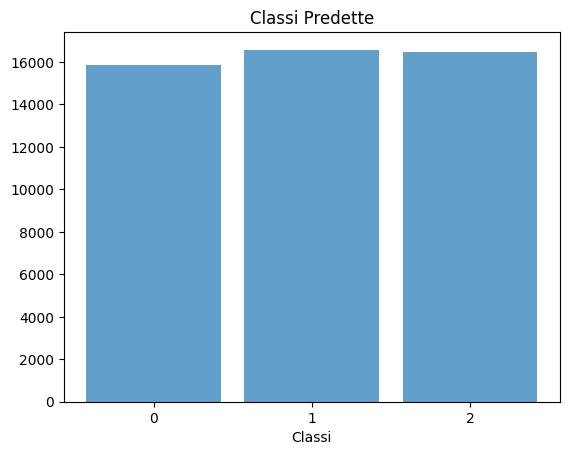

In [ ]:
adam_all_preds = torch.cat(val_pred_adam)

# Converto il tensore in una lista di valori numerici
adam_preds_numeric = adam_all_preds.tolist()

# Creo l'istogramma
plt.hist(adam_preds_numeric, bins=[-0.5, 0.5, 1.5, 2.5], alpha=0.7, rwidth=0.85)

# Etichette e titolo
plt.xlabel('Classi')
plt.ylabel('')
plt.title('Classi Predette')

# Imposto i ticks dell'asse x per mostrare solo le classi
plt.xticks([0, 1, 2], labels=['0', '1', '2'])

plt.show()

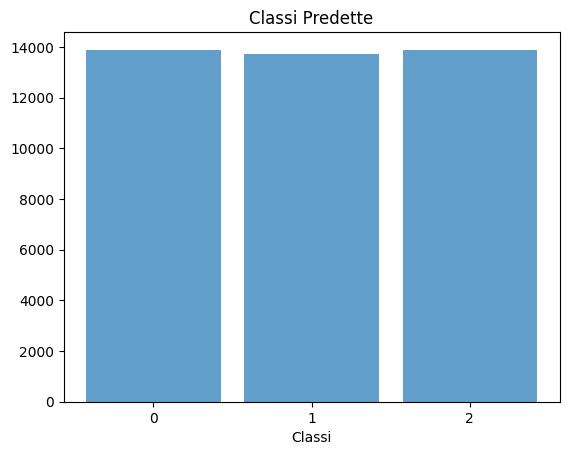

In [ ]:
sgd_all_preds = torch.cat(val_pred_sgd)

# Converto il tensore in una lista di valori numerici
sgd_preds_numeric = sgd_all_preds.tolist()

# Creo l'istogramma
plt.hist(sgd_preds_numeric, bins=[-0.5, 0.5, 1.5, 2.5], alpha=0.7, rwidth=0.85)

# Etichette e titolo
plt.xlabel('Classi')
plt.ylabel('')
plt.title('Classi Predette')

# Imposto i ticks dell'asse x per mostrare solo le classi
plt.xticks([0, 1, 2], labels=['0', '1', '2'])

plt.show()

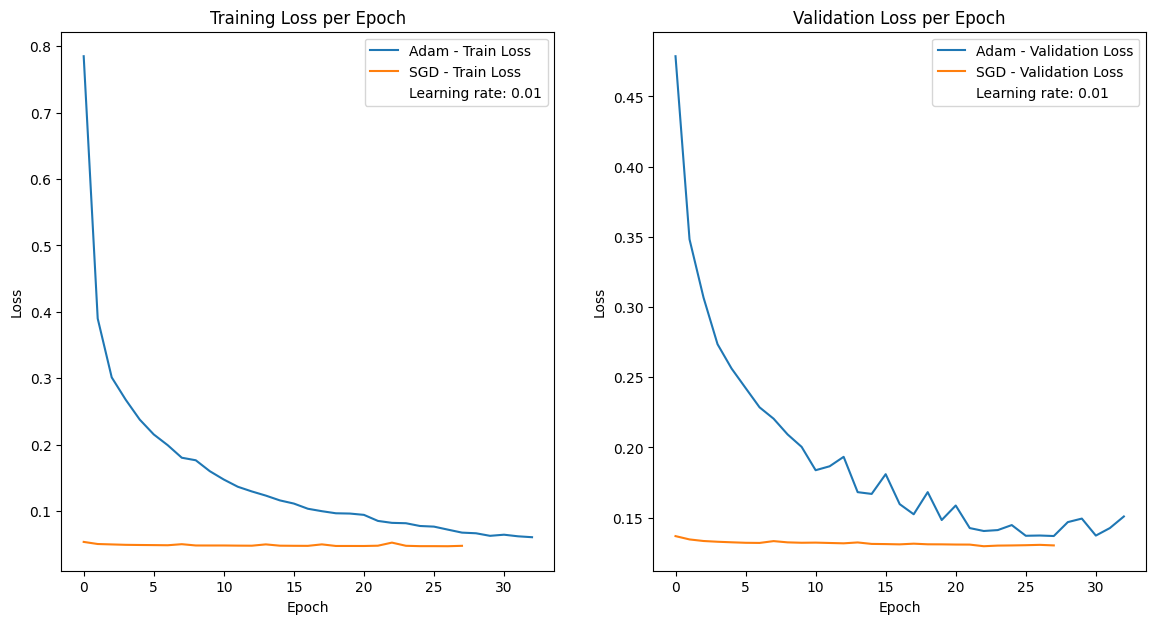

In [ ]:
# Grafici
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].plot(train_losses_adam, label='Adam - Train Loss')
axs[0].plot(train_losses_sgd, label='SGD - Train Loss')
axs[0].plot([], [], ' ', label="Learning rate: 0.01")
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss per Epoch')
axs[0].legend()

axs[1].plot(val_losses_adam, label='Adam - Validation Loss')
axs[1].plot(val_losses_sgd, label='SGD - Validation Loss')
axs[1].plot([], [], ' ', label="Learning rate: 0.01")
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Validation Loss per Epoch')
axs[1].legend()

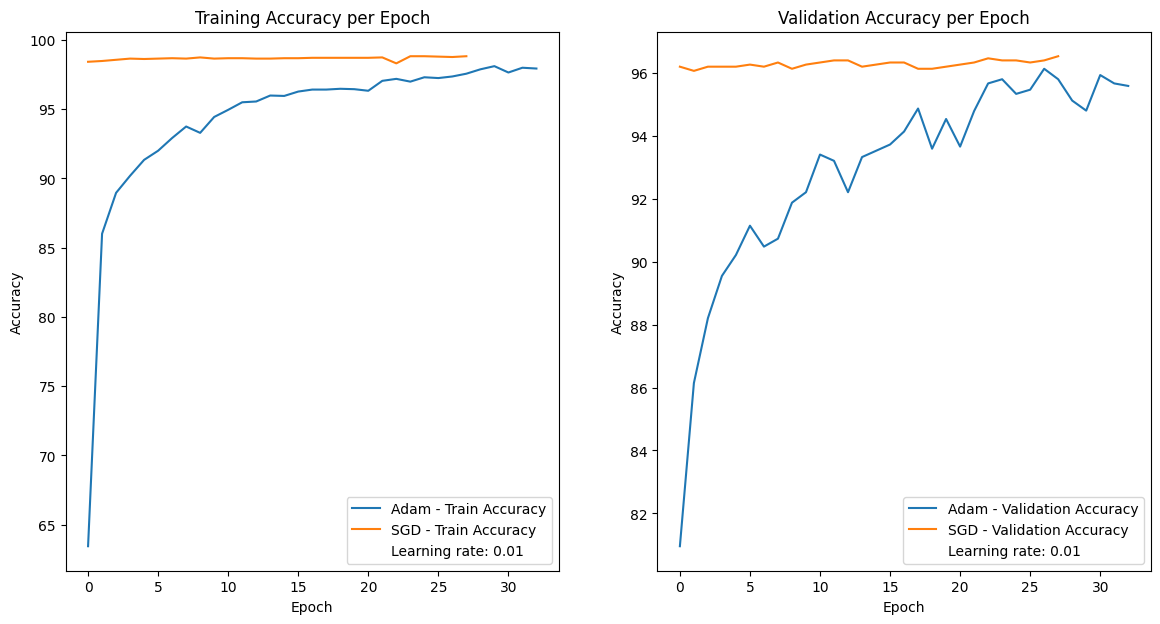

In [ ]:
# Grafici
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].plot(train_accs_adam, label='Adam - Train Accuracy')
axs[0].plot(train_accs_sgd, label='SGD - Train Accuracy')
axs[0].plot([], [], ' ', label="Learning rate: 0.01")
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training Accuracy per Epoch')
axs[0].legend()

axs[1].plot(val_accs_adam, label='Adam - Validation Accuracy')
axs[1].plot(val_accs_sgd, label='SGD - Validation Accuracy')
axs[1].plot([], [], ' ', label="Learning rate: 0.01")
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Validation Accuracy per Epoch')
axs[1].legend()

#### NEURAL SVM

In [ ]:
# Ottengo l'output di train del penultimo layer
penultimate_output_train = model.get_penultimate_layer_output(X_train_tensor)

In [ ]:
# Ottengo l'output di test del penultimo layer
penultimate_output_test = model.get_penultimate_layer_output(X_test_tensor)

In [ ]:
# Converto il tensore risultante in una lista di valori numerici
x_svm_train = penultimate_output_train.detach().numpy()

In [ ]:
# Converto il tensore risultante in una lista di valori numerici
x_svm_test = penultimate_output_test.detach().numpy()

In [ ]:
# SVC One-vs-One
svm_knn = SVC(decision_function_shape='ovo')

# Lista di parametri
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1e-3, 1e-2, 0.1, 1],
    'kernel': ['rbf']
}
# Creazione della ricerca su griglia con cross-validation
grid_search_knn = GridSearchCV(estimator=svm_knn, param_grid=param_grid, cv=5, verbose=2)

# Addestramento del modello con la ricerca su griglia
grid_search_knn.fit(x_svm_train, y_train)

# Migliori iperparametri
best_params_knn = grid_search_knn.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.

In [ ]:
# Creazione del modello SVC con i migliori iperparametri
svm_knn = SVC(**best_params_knn, decision_function_shape='ovo', probability=True)
svm_knn.fit(x_svm_train, y_train)
predic = svm_knn.predict(x_svm_test)
# Matrice di confusione
print(confusion_matrix(y_test, predic))

[[498  21   4]
 [  5 469   1]
 [  0   4 480]]


In [ ]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       523
           2       0.95      0.99      0.97       475
           3       0.99      0.99      0.99       484

    accuracy                           0.98      1482
   macro avg       0.98      0.98      0.98      1482
weighted avg       0.98      0.98      0.98      1482

